<a href="https://colab.research.google.com/github/harsh-kmr/ml_projects/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## TensorFlow

### Basic

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as mtp

tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors(Tensors are multi-dimensional arrays with a uniform type) . Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer 

The shape of a Tensor defines its number of dimensions and the size of each 
dimension. The rank of a Tensor provides the number of dimensions (n-dimensions)

---

In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Tensors have shapes. Some vocabulary:

1. Shape: The length (number of elements) of each of the axes of a tensor.

2. Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

3. Axis or Dimension: A particular dimension of a tensor.

4. Size: The total number of items in the tensor, the product of the shape vector's elements.



In [ ]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [ ]:
matrix = tf.constant([1,2,3,4,5,6], dtype=tf.int32, shape=(2,3))

matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
reshaped = tf.reshape(matrix,[2*3])
reshaped2 = tf.reshape(matrix,[-1])
reshaped2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

In [ ]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Broadcasting is a concept borrowed from the equivalent feature in NumPy. In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

In [ ]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

A tensor with variable numbers of elements along some axis is called "ragged". Use tf.ragged.RaggedTensor for ragged data.

In [ ]:
a = tf.constant([[15,16],[17,18]])
b = tf.constant([10,10])

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)


In [ ]:
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [ ]:
func(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[225, 234],
       [243, 252]], dtype=int32)>

In [ ]:
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


### Neural networks in TensorFlow

TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity.

In [ ]:
!pip install mitdeeplearning
import mitdeeplearning as mdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 11.5 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115441 sha256=b1762027c17ac8f4ba9108626ba7d30a08ef30d44bda4830846fe350dd2fb8e4
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [ ]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.add(tf.matmul(x,self.W),self.b)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y


In [ ]:

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.6653695 ]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the Sequential model from Keras and a single Dense layer to define our network. With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [ ]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''

model_output = model(x_input)
print(model_output)

tf.Tensor([[0.5607363  0.65668976 0.1249697 ]], shape=(1, 3), dtype=float32)


### digit classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

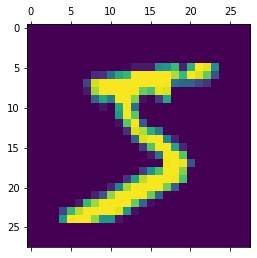

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), -1)/255
X_test_flattened = X_test.reshape(len(X_test), -1)/255

scaling improves the accuracy.

In [ ]:
X_train_flattened.shape

(60000, 784)

input: 784

output: 10 

784 input to 10 output

simple NN without any hidden layer

<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg"/>

In [ ]:
model = keras.Sequential(keras.layers.Dense(10,input_shape=(784,), activation="sigmoid", ))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4706 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9236


[0.2680058479309082, 0.9236000180244446]

y_predicted will be an array of _________ , where the highest value represent the class/ category the data point will belong to.

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.73662659e-02, 3.05542443e-07, 4.82722707e-02, 9.45348263e-01,
       2.65075685e-03, 1.03771105e-01, 1.14853083e-06, 9.99813139e-01,
       6.15767203e-02, 5.99195182e-01], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(33.0, 0.5, 'Truth')

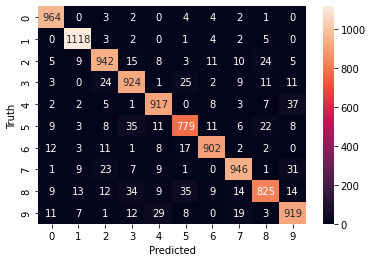

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

import seaborn as sn

%matplotlib inline
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

using hidden layer

786--->100--->10

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, input_shape=(784,)))
model2.add(keras.layers.Dense(10, activation='sigmoid'))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8962
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.9173
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.9220
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2743 - accuracy: 0.9233


In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, input_shape=(784,), activation='relu'))
model3.add(keras.layers.Dense(10, activation='sigmoid'))

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model3.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1202 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0847 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9847


In [ ]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.9207


[0.2839291989803314, 0.9207000136375427]

In [ ]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9726


[0.08516579866409302, 0.972599983215332]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

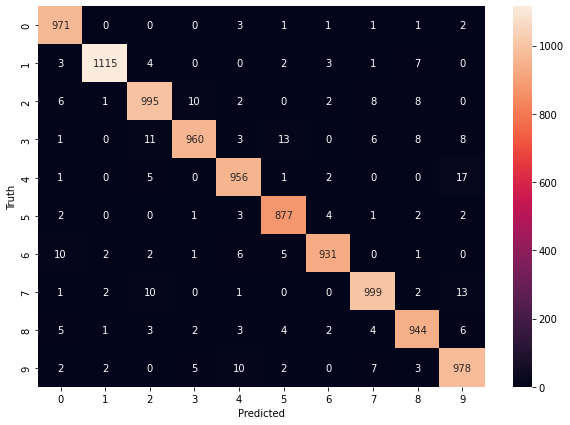

In [ ]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train/255, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2751 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9842


In [ ]:
model.evaluate(X_test/255,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0853 - accuracy: 0.9735


[0.08534921705722809, 0.9735000133514404]

In [ ]:
y_pred= model.predict(X_test/255)

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

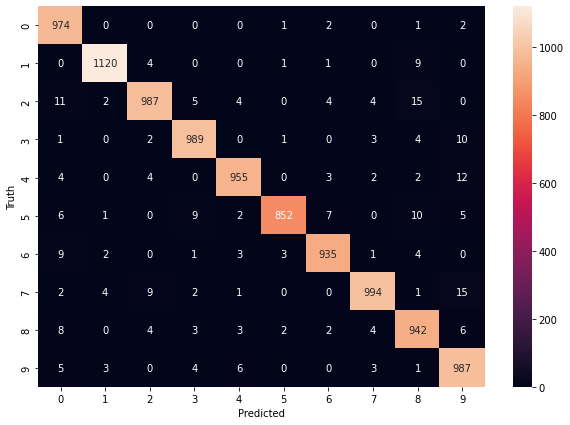

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### activation function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

purpose of activation function is to introduce non linearity in network

some common activation function are 🔻


*   Sigmoid
*   ReLU
*   Tanh


sigmoid :- is same as logistic regression.

Y(x) = Sigmoid(x) = 1/(1+e^-x)

ReLU(x):

{ 0 x<0

x  x>=0

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f5ae4481873b5c6117772f69d22b262a24f38e7c" background="white" />

### Image classification using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train, y_train,),(x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

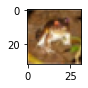

In [ ]:
plot_sample(0)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

scaling

In [ ]:
x_test = x_test/255
x_train = x_train/255
y_test = y_test/255
y_train = y_train/255

one hot encoding

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
from tensorflow.python.eager.monitoring import Metric
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train, y_train_categorical, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2663e-10 - accuracy: 1.0000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0041e-10 - accuracy: 1.0000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.7180e-10 - accuracy: 1.0000
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5272e-10 - accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1934e-10 - accuracy: 1.0000
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9073e-10 - accuracy: 1.0000
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5974e-10 - accuracy: 1.0000
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3351e-10 - accuracy: 1.0000
Epoch 10/10
1563/1563 [===========================

In [ ]:
model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_categorical, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.5831e-11 - accuracy: 1.0000
Epoch 10/10
1563/1563 [=======================

### churn prediction

#### telephone company

In [1]:
url ="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv"

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

data is skewed but we donot care about that for now

we can drop customerID as it doesnt provide any useful information

In [6]:
df.drop(columns = ['customerID',], inplace= True )

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df2 = pd.get_dummies(data = df,columns=['gender'], drop_first =True )


df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [9]:
df2.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender_Male           uint8
dtype: object

In [10]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
for col in objeType:
  print(col, ':', df2[col].unique())

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


lets turn all no................. into no

In [12]:
def fun(word):
  word = word.lower()
  if 'no' in word:
    return 0
  elif 'yes' in word:
    return 1
  else:
    return word

In [13]:
for col in objeType:
  df2[col] = df2[col].apply(fun)

df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0,0
1,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.5,0,1
2,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1,1
3,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0,1
4,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1,0


update objeType

In [14]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']

we can change total charge to number as it is present as string

In [15]:
#pd.to_numeric(df2['TotalCharges'])

there are some empty string that cannot be changed into number.
we can remove them or replace it it zero/null and later replace it avg value or any other missing values handaling method.

In [16]:
df2[df2['TotalCharges']== " "].shape, df2.shape

((11, 20), (7043, 20))

we can easily drop the empty total charges rows

In [17]:
df3 = df2[df2['TotalCharges']!= " "]

In [18]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']

In [19]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'])

<ipython-input-19-c7215ee5a425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'])


In [20]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod']

In [21]:
for col in objeType:
  print(col, ':', df3[col].unique())

InternetService : ['dsl' 'fiber optic' 0]
Contract : ['month-to-month' 'one year' 'two year']
PaymentMethod : ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']


In [22]:
df4 = pd.get_dummies(data= df3, columns=objeType)



In [23]:
df4.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_dsl                          uint8
InternetService_fiber optic    

In [24]:
x = df4.drop(columns=['Churn',])
y = df4['Churn']

In [25]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


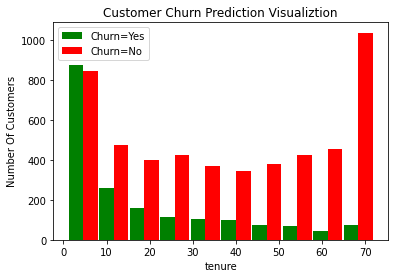

In [26]:
tenure_churn_no = df4[df4.Churn==0].tenure
tenure_churn_yes = df4[df4.Churn==1].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

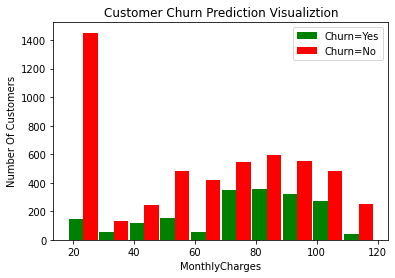

In [27]:
MonthlyCharges_churn_no = df4[df4.Churn==0].MonthlyCharges
MonthlyCharges_churn_yes = df4[df4.Churn==1].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

lets build a **ANN** model

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
model = keras.Sequential([
    keras.layers.Input(shape= (26,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),
]
)

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y)

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
154/154 [==============================] - 1s 1ms/step - loss: 55.6119 - accuracy: 0.5146
Epoch 2/20
154/154 [==============================] - 0s 1ms/step - loss: 0.7355 - accuracy: 0.6711
Epoch 3/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.7668
Epoch 4/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7633
Epoch 5/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7633
Epoch 6/20
154/154 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7611
Epoch 7/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7672
Epoch 8/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7735
Epoch 9/20
154/154 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.7590
Epoch 10/20
154/154 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.769

In [32]:
model.evaluate(x_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8114


[0.4142691493034363, 0.8113744258880615]

In [33]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

66/66 [==============================] - 0s 3ms/step


In [34]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.59      0.63       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



Text(69.0, 0.5, 'Truth')

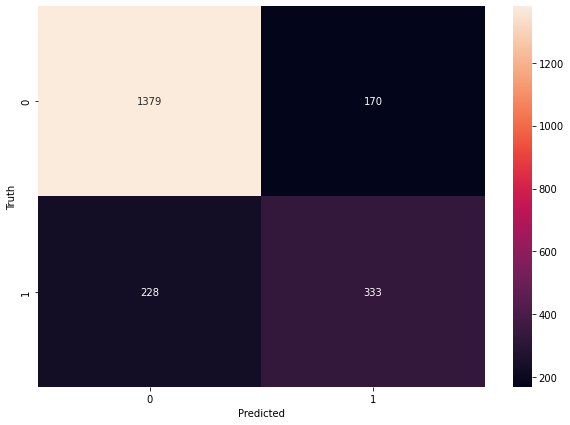

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### bank churn